# (Data Visualization Ford Go Bike 2017)
## by (Abdullah Al-Abdullatif)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import Ford Go Bike csv file into jupyter notebook
df_bike = pd.read_csv('2017-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

`Awesome! The data is clean`

In [6]:
# drop unnecessary columns in the clean DataFrame
df_bike.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


In [7]:
df_bike.sample()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type
258485,256,2017-10-10 09:31:13.4920,2017-10-10 09:35:30.2320,S Van Ness Ave at Market St,Golden Gate Ave at Polk St,442,Subscriber


In [8]:
# make useful of the start time and added the month and day of week to make it useful in analysis
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

df_bike['hour_of_day'] = df_bike.start_time.dt.strftime('%H')
df_bike['month'] = df_bike['start_time'].apply(lambda x: x.strftime('%B').lower())
df_bike['day_of_week'] = df_bike['start_time'].apply(lambda x: x.strftime('%A').lower())

In [9]:
# order the days.
day_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
# create categorical variable.
df_bike['day_of_week'] = pd.Categorical(df_bike['day_of_week'], categories= day_order, ordered = True)

In [10]:
df_bike.sample()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,hour_of_day,month,day_of_week
205071,636,2017-10-25 16:10:40.733,2017-10-25 16:21:16.882,Telegraph Ave at 19th St,2nd Ave at E 18th St,2712,Subscriber,16,october,wednesday


In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        519700 non-null  int64         
 1   start_time          519700 non-null  datetime64[ns]
 2   end_time            519700 non-null  datetime64[ns]
 3   start_station_name  519700 non-null  object        
 4   end_station_name    519700 non-null  object        
 5   bike_id             519700 non-null  int64         
 6   user_type           519700 non-null  object        
 7   hour_of_day         519700 non-null  object        
 8   month               519700 non-null  object        
 9   day_of_week         519700 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(2), object(5)
memory usage: 36.2+ MB


In [12]:
# see what are the more reserved each month
df_bike.month.value_counts()

october      108937
september     98558
november      95612
december      86539
august        83292
july          44073
june           2689
Name: month, dtype: int64

In [13]:
# see how many station we have 
df_bike.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

### What is the structure of your dataset?

The shape of the dataset includes 519,700 trips with 10 features.
The columns are:


| Variable Name      |   |   |   |   |
|--------------------|---|---|---|---|
| duration_sec       |   |   |   |   |
| start_time         |   |   |   |   |
| end_time           |   |   |   |   |
| start_station_name |   |   |   |   |
| end_station_name   |   |   |   |   |
| bike_id            |   |   |   |   |
| user_type          |   |   |   |   |
| hour_of_day        |   |   |   |   |
| month              |   |   |   |   |
| day_of_week        |   |   |   |   |

`I learned how to insert table in jupyter notebook from this website: `   
https://www.lynda.com/Pandas-tutorials/Markdown-tables/518161/551083-4.html

### What is/are the main feature(s) of interest in your dataset?

- Average of time trips.
- Which user type most likely using the bike.
- Number of trips for each month

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The duration_sec column will help me in the average trip time.
- The month column will help me in monthly bike ride trends.
- The user_type column will help me in the type average trip times.

## Univariate Exploration

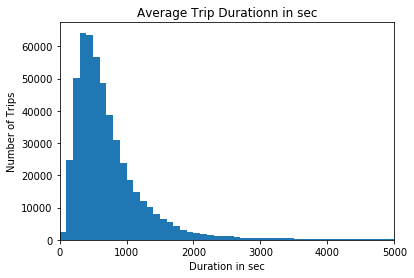

In [14]:
# find the distribution for trip durations
bin_edge = np.arange(0, df_bike['duration_sec'].max() + 100 , 100)
plt.hist(data = df_bike, x = 'duration_sec', bins=bin_edge)
plt.xlim(0,5000)
plt.title('Average Trip Durationn in sec')
plt.xlabel('Duration in sec')
plt.ylabel('Number of Trips');

We see the majority of the durtion were on 500 sec to have a clear way I would convert the sec to min.

In [15]:
# add the duration_min to have easier understand of the duration
df_bike['duration_min']= df_bike['duration_sec'] / 60

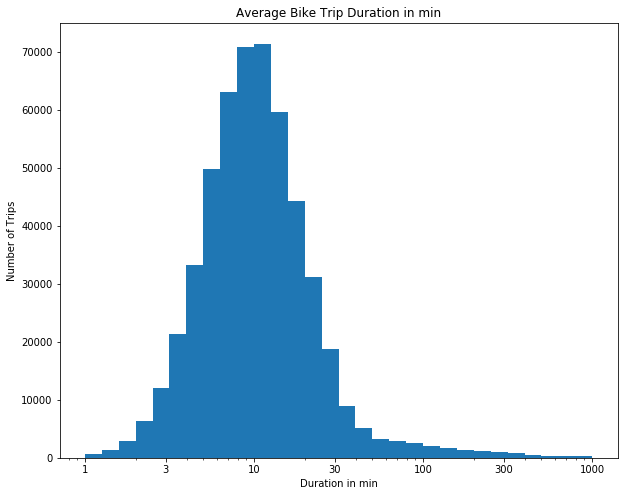

In [16]:
# take the average of trip duration in min
plt.figure(figsize = [10,8])
bins = 10**np.arange(0, 3 + 0.1, 0.1)
ticks =  [ 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_bike , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in min');
plt.title('Average Bike Trip Duration in min');
plt.ylabel('Number of Trips');

The duration trip distribution, show that the averge duration per ride trip around 10 min .

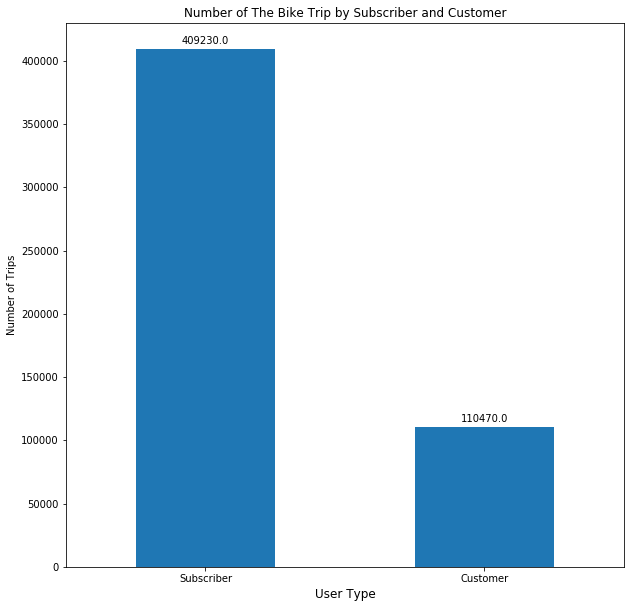

In [17]:
# find the number of the bike trips for the user_type
ax=df_bike.user_type.value_counts().plot(kind='bar',figsize=(10,10))
ax.set_xlabel("User Type", fontsize=12)
ax.set_ylabel("Number of Trips", fontsize=10)
plt.title('Number of The Bike Trip by Subscriber and Customer');
plt.xticks(rotation = 0)
def add_value_labels(ax, spacing=3):
   
    # for each bar place a label
    for rect in ax.patches:
        # get X and Y placement of label from rect
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # number of points between bar and label change to your liking
        sp = spacing
        # vertical alignment for positive values
        ver = 'bottom'

        # هf value of bar is negative: place label below bar
        if y_value < 0:
            # invert space to place label below
            sp *= -1
            # vertically align label at top
            va = 'top'

        # use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # create annotation
        ax.annotate(
            label,                      # use label as label
            (x_value, y_value),         # place label at end of the bar
            xytext=(0, sp),             # vertically shift label by space
            textcoords="offset points", # interpret xytext as offset in points
            ha='center',                # horizontally center label
            va=ver)                     # vertically align label differently for
                                        # positive and negative values


# I learned how to adding value labels on a matplotlib bar chart from this "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart" 
add_value_labels(ax)

From that we can say that the subscribers are the majority with large difference than customers.

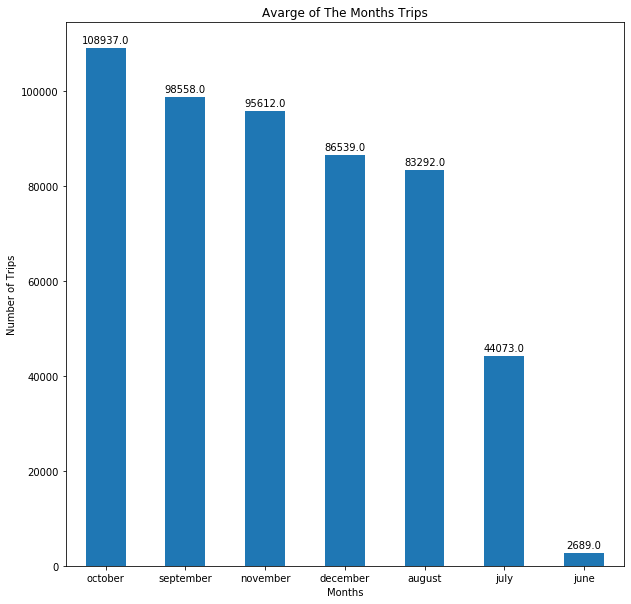

In [18]:
# average month trips of the months
ax=df_bike.month.value_counts().plot(kind='bar',figsize=(10,10), title='Avarge of The Months Trips');
ax.set_xlabel("Months");
ax.set_ylabel("Number of Trips");
plt.xticks(rotation = 0)
add_value_labels(ax)

As we see that the october is the busiest month and have the largest amount of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We can see the plots above that I used a duration of the trips and months and the user type, it doesn't has any unusual points, I had just to do a transformation for the duration trip from the second to minute.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

At first the distribution of the duration trip were unusual but after converting it from second to minutes it become clear.


## Bivariate Exploration

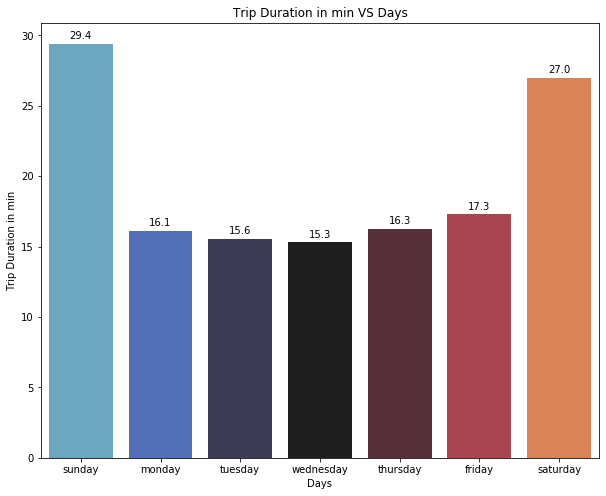

In [19]:
# find the relationship between trip duration and days
plt.figure(figsize = [10,8])
ax = sb.barplot(data=df_bike,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="icefire", ci=None)
plt.xlabel('Days')
plt.ylabel('Trip Duration in min')
plt.title('Trip Duration in min VS Days');
plt.xticks(rotation = 0)
add_value_labels(ax)

As we see that on Saturday and Sunday the people are driving the bikes more than the rest of the week

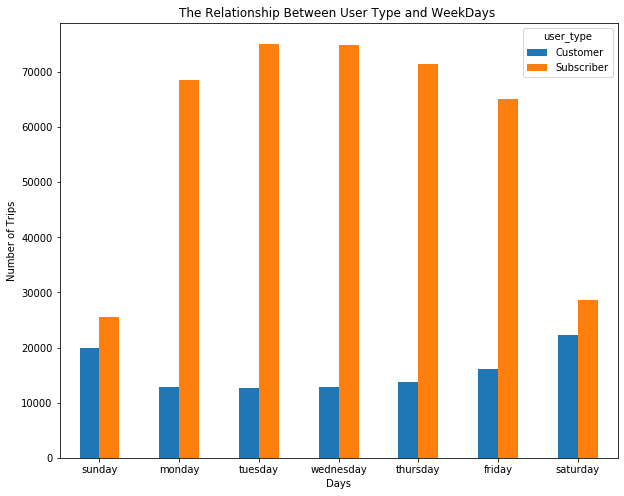

In [20]:
# find the relationship between user type and  weekdays
ax = pd.crosstab(df_bike['day_of_week'], df_bike['user_type']).plot(kind='bar', stacked=False, title='The Relationship Between User Type and WeekDays ',figsize=(10,8));
ax.set_xlabel("Days",fontsize=10);
plt.xticks(rotation = 0)
ax.set_ylabel("Number of Trips",fontsize=10);

As we see that on saturday and sunday the customer and subscriber number are close unlike other days.

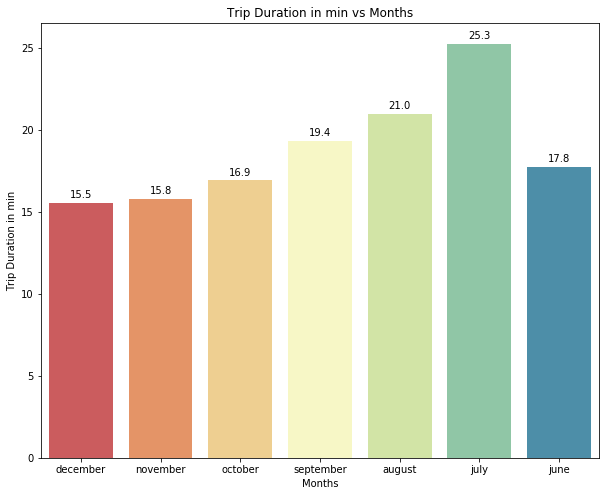

In [21]:
# the relationship between trip duration and months
plt.figure(figsize = [10,8])
ax = sb.barplot(data=df_bike, x='month', y='duration_min', color=sb.color_palette()[0], palette='Spectral', ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration in min')
plt.title('Trip Duration in min vs Months');
plt.xticks(rotation =0)
add_value_labels(ax)

As we see that on july and august people use the bike more than the rest of the months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We have seen that we have a positive relationship between weekdays and duration.
- We have seen the relationship between user type and weekdays.
- We have seen that on July and August users use the bike more than the rest of the months.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between user type and weekdays was impressed me, because earlier I counted the user types and the subscribers, were using the bikes much more than customers, but when we saw that the majority of customers are using it only on Saturday and Sunday which I think it's weekends in most of the countries in the world but not in my country Saudi Arabia. We could do something in these days to attract more customers.

## Multivariate Exploration

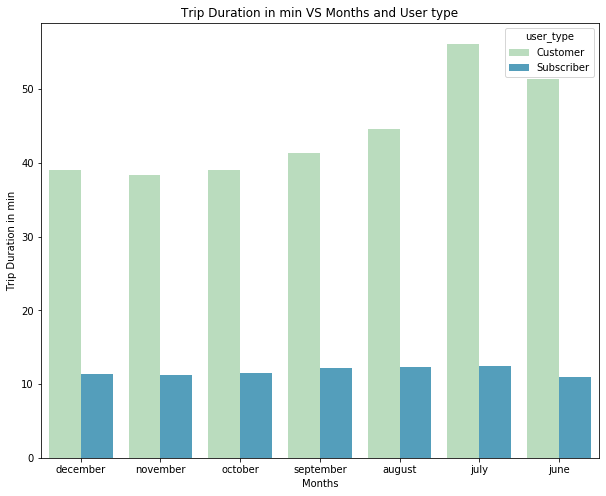

In [22]:
# see the avarge of trip duration on months for each user type.
plt.figure(figsize = [10,8]);
ax = sb.barplot(data=df_bike,x='month',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='GnBu', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration in min');
plt.title('Trip Duration in min VS Months and User type');
plt.xticks(rotation = 0);

As we see that the customers oftenly using the bike much longer duration than the subscribers.

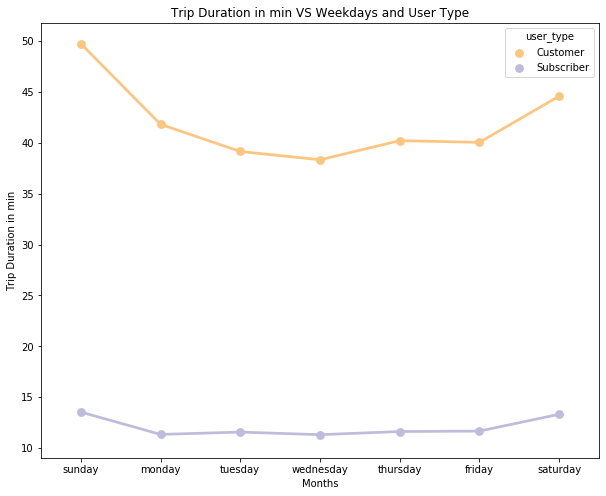

In [23]:
plt.figure(figsize = [10,8]);
ax = sb.pointplot(data=df_bike,x='day_of_week',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='PuOr', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration in min');
plt.title('Trip Duration in min VS Weekdays and User Type');
plt.xticks(rotation = 0);

As we see the customer and subscriber are using bikes much more on Saturday and Sunday which I think it's weekends in most of the countries in the world.

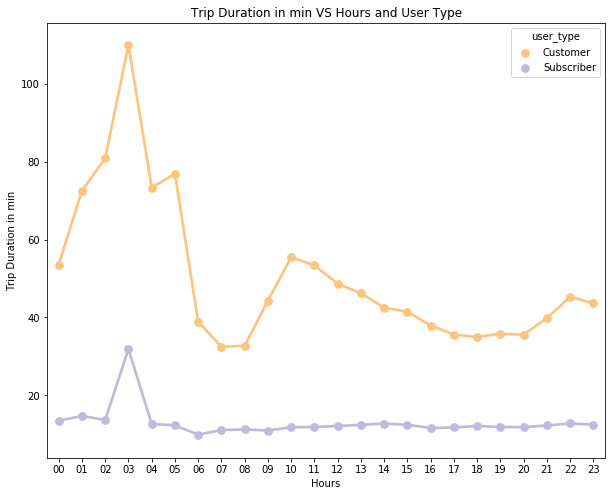

In [24]:
plt.figure(figsize = [10,8]);

ax = sb.pointplot(data=df_bike,x='hour_of_day',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='PuOr', ci=None);
plt.xlabel('Hours');
plt.ylabel('Trip Duration in min');
plt.title('Trip Duration in min VS Hours and User Type');
plt.xticks(rotation = 0);

As we see that trips that started at 3 am the duration of it is higher.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We made a relationship between months and user type VS trip duration.
### Were there any interesting or surprising interactions between features?

We saw that the customers oftenly using the bike much longer duration than the subscribers. From that we could make some assumptions, and may it lead to some ideas we could profit from them.